                                                        Iphone Purchase Prediction

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
data = pd.read_csv('D:/python/Machine Learning/Classification/Iphone/iphone_purchase_records.csv')
data['Mapping Gender'] = np.zeros((data.shape[0], 1))
for i in range(0, data.shape[0]):
    if data.loc[i, 'Gender'] == "Male":
        data.loc[i, 'Mapping Gender'] = 1
X = data[['Age' ,'Salary', 'Mapping Gender']]
Y = data['Purchase Iphone']
data.head()

,Gender,Age,Salary,Purchase Iphone,Mapping Gender
0,Male,19,19000,0,1.0
1,Male,35,20000,0,1.0
2,Female,26,43000,0,0.0
3,Female,27,57000,0,0.0
4,Male,19,76000,0,1.0


Data Visualisaion

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             400 non-null    int64  
 1   Salary          400 non-null    int64  
 2   Mapping Gender  400 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [46]:
X.describe()

,Age,Salary,Mapping Gender
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.490000
std,10.482877,34096.960282,0.500526
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


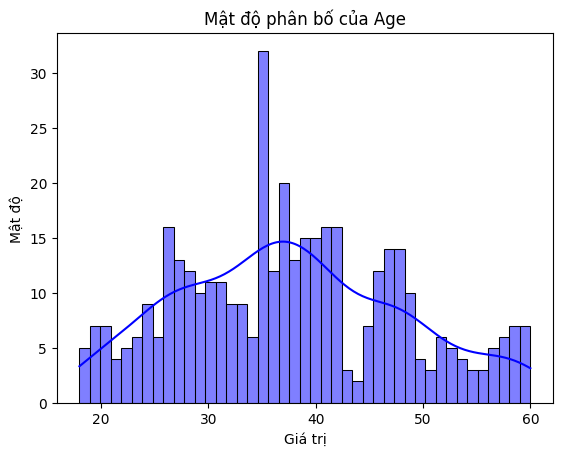

In [47]:
sns.histplot(data=X, x="Age", bins=43, kde=True, color="blue")
plt.title("Mật độ phân bố của Age")
plt.xlabel("Giá trị")
plt.ylabel("Mật độ")
plt.show()

<Axes: xlabel='Salary', ylabel='Count'>

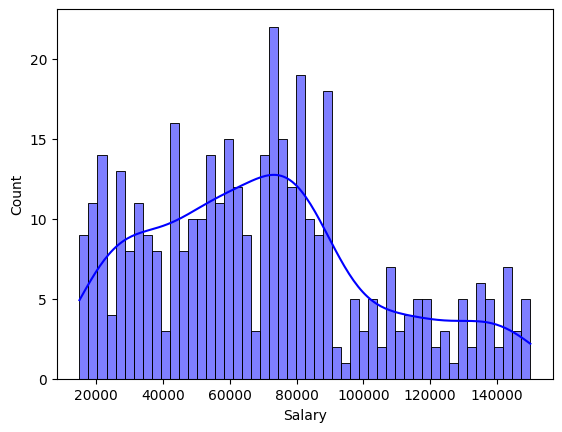

In [48]:
sns.histplot(data=X, x="Salary", bins=50, kde=True, color="blue")


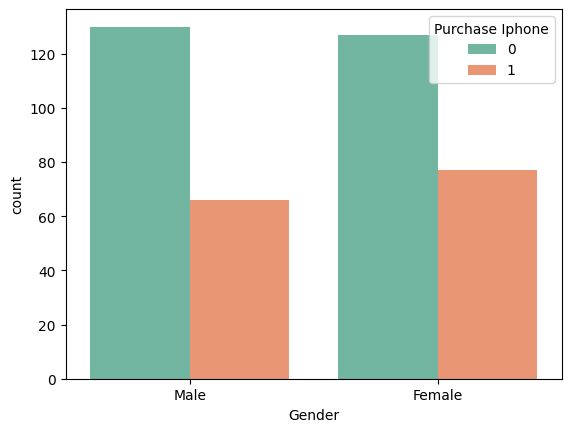

In [49]:
sns.countplot(x='Gender', hue='Purchase Iphone', data=data, palette='Set2')
plt.savefig("gender countplot.png")
plt.show()

Solution 1: Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=True)
lg_model_fit = lg_model.fit(x_train, y_train)
pred = lg_model_fit.predict(x_test)
print("The accuracy of Logistic Regression model is", round((accuracy_score(y_test,pred)*100),2),"%")

The accuracy of Logistic Regression model is 81.43 %


Logistic Regression Independent

In [51]:
def sigmoid(s):
    s = np.clip(s, -500, 500)  # Giới hạn giá trị để tránh overflow
    return 1 / (1 + np.exp(-s))



def LossFunction(X, w, y_true, y_pred):
    m = len(y_pred)
    return -1 / m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def LogisticRegression_model(X, y):
    alpha = 0.01
    epochs = 100
    bias = 0
    n, m = X.shape
    w = np.zeros((m, 1))
    y = y.to_numpy().reshape(-1, 1)  # Đảm bảo y có dạng (n,1)
    for i in range(0, epochs):
        linear_model = np.dot(X, w) + bias
        y_pred = sigmoid(linear_model)
        w = w - alpha * (1 / n) * np.dot(X.T, (y_pred - y))
        bias = bias - alpha * (1 / n) * np.sum(y_pred - y)
    return w, bias


def predict(X, w, bias):
    linear_model = np.dot(X, w) + bias
    y_pred = sigmoid(linear_model)
    return (y_pred >= 0.5).astype(int)  # Chuyển thành mảng nhãn 0 hoặc 1


log_model_weight, log_model_bias = LogisticRegression_model(x_train, y_train)
y_pred = predict(x_test, log_model_weight, log_model_bias)
print("The accuracy of Logistic Regression model is", round((accuracy_score(y_test,pred)*100),2),"%")


The accuracy of Logistic Regression model is 81.43 %


In this problem, we can use the Logistic Regression model to classify because the dataset doesn't have many features and the result is binary (1 or 0).

K-nearest-neighbors

In [52]:
X_k = data[['Age' ,'Salary']]
Y_k = data['Purchase Iphone']

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)
random_states = [42, 1234, 2024, 5678, 9999]
accuracies = []
for i in random_states:
    x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(X_k, Y_k, train_size=0.8, random_state=i)
    model_fit = clf.fit(x_train_k, y_train_k)
    y_pred_k = model_fit.predict(x_test_k)
    accuracies.append(round((accuracy_score(y_test_k,y_pred_k)*100),2))

print(accuracies)
print(np.mean(accuracies))

[77.5, 87.5, 87.5, 76.25, 72.5]
80.25
